✅ Connected to MySQL Database!
🎉 All tables created successfully!
🎉 Data inserted successfully!

📊 Combined Sales Data:
   Order_Id  CId  PId    Order_Dt  Quantity  Total_Amt         Name  \
0      1001    1  101  2025-01-10         1    55000.0   Ravi Kumar   
1      1002    1  104  2025-01-12         2     6000.0   Ravi Kumar   
2      1003    2  102  2025-02-05         1    25000.0    Sita Devi   
3      1004    2  105  2025-02-10         1     7000.0    Sita Devi   
4      1005    3  106  2025-03-15         1    40000.0  Rahul Reddy   

             Email       City        P_Name         Category    Price  
0   ravi@gmail.com    Chennai        Laptop      Electronics  55000.0  
1   ravi@gmail.com    Chennai    Headphones      Accessories   3000.0  
2   sita@gmail.com  Bangalore    Smartphone      Electronics  25000.0  
3   sita@gmail.com  Bangalore    Smartwatch      Accessories   7000.0  
4  rahul@gmail.com  Hyderabad  Refrigerator  Home Appliances  40000.0  


C:\Users\Hp\AppData\Local\Temp\ipykernel_864\204012886.py:132: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers = pd.read_sql("SELECT * FROM customers", conn)
C:\Users\Hp\AppData\Local\Temp\ipykernel_864\204012886.py:133: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products = pd.read_sql("SELECT * FROM products", conn)
C:\Users\Hp\AppData\Local\Temp\ipykernel_864\204012886.py:134: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders = pd.read_sql("SELECT * FROM orders", conn)


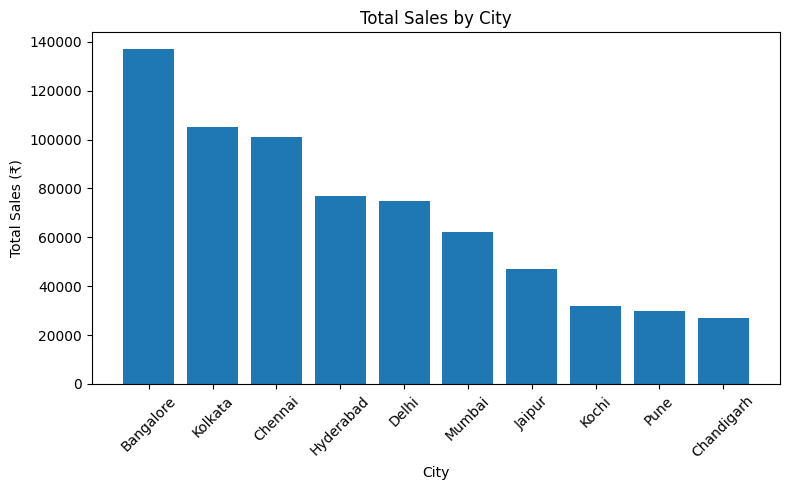

🔒 MySQL connection closed.


In [7]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

try:
    # -------------------------------------------------
    # Connect to MySQL
    # -------------------------------------------------
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="nar",
        database="SalesDb"
    )
    cursor = conn.cursor()
    print("✅ Connected to MySQL Database!")

    # -------------------------------------------------
    # Create Tables
    # -------------------------------------------------
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS customers (
            CId INT PRIMARY KEY,
            Name VARCHAR(30),
            Email VARCHAR(40),
            City VARCHAR(40)
        )
    """)
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS products (
            PId INT PRIMARY KEY,
            P_Name VARCHAR(30),
            Category VARCHAR(30),
            Price DECIMAL(10,2)
        )
    """)
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS orders (
            Order_Id INT PRIMARY KEY,
            CId INT,
            PId INT,
            Order_Dt DATE,
            Quantity INT,
            Total_Amt DECIMAL(10,2),
            FOREIGN KEY (CId) REFERENCES customers(CId),
            FOREIGN KEY (PId) REFERENCES products(PId)
        )
    """)
    conn.commit()
    print("🎉 All tables created successfully!")

    # -------------------------------------------------
    # Clear Old Data
    # -------------------------------------------------
    cursor.execute("DELETE FROM orders")
    cursor.execute("DELETE FROM products")
    cursor.execute("DELETE FROM customers")
    conn.commit()

    # -------------------------------------------------
    # Insert Data
    # -------------------------------------------------
    cursor.executemany("""
        INSERT INTO customers (CId, Name, Email, City)
        VALUES (%s, %s, %s, %s)
    """, [
        (1, 'Ravi Kumar', 'ravi@gmail.com', 'Chennai'),
        (2, 'Sita Devi', 'sita@gmail.com', 'Bangalore'),
        (3, 'Rahul Reddy', 'rahul@gmail.com', 'Hyderabad'),
        (4, 'Sneha Sharma', 'sneha@gmail.com', 'Mumbai'),
        (5, 'Kiran Patel', 'kiran@gmail.com', 'Delhi'),
        (6, 'Amit Joshi', 'amit@gmail.com', 'Pune'),
        (7, 'Priya Mehta', 'priya@gmail.com', 'Kolkata'),
        (8, 'Vivek Singh', 'vivek@gmail.com', 'Chandigarh'),
        (9, 'Deepa Nair', 'deepa@gmail.com', 'Kochi'),
        (10, 'Anil Kumar', 'anil@gmail.com', 'Jaipur')
    ])
    conn.commit()

    cursor.executemany("""
        INSERT INTO products (PId, P_Name, Category, Price)
        VALUES (%s, %s, %s, %s)
    """, [
        (101, 'Laptop', 'Electronics', 55000.00),
        (102, 'Smartphone', 'Electronics', 25000.00),
        (103, 'Tablet', 'Electronics', 18000.00),
        (104, 'Headphones', 'Accessories', 3000.00),
        (105, 'Smartwatch', 'Accessories', 7000.00),
        (106, 'Refrigerator', 'Home Appliances', 40000.00),
        (107, 'Microwave Oven', 'Home Appliances', 12000.00),
        (108, 'Washing Machine', 'Home Appliances', 35000.00)
    ])
    conn.commit()

    cursor.executemany("""
        INSERT INTO orders (Order_Id, CId, PId, Order_Dt, Quantity, Total_Amt)
        VALUES (%s, %s, %s, %s, %s, %s)
    """, [
        (1001, 1, 101, '2025-01-10', 1, 55000.00),
        (1002, 1, 104, '2025-01-12', 2, 6000.00),
        (1003, 2, 102, '2025-02-05', 1, 25000.00),
        (1004, 2, 105, '2025-02-10', 1, 7000.00),
        (1005, 3, 106, '2025-03-15', 1, 40000.00),
        (1006, 4, 107, '2025-03-20', 2, 24000.00),
        (1007, 4, 108, '2025-03-21', 1, 35000.00),
        (1008, 5, 101, '2025-04-01', 1, 55000.00),
        (1009, 6, 103, '2025-04-10', 1, 18000.00),
        (1010, 7, 102, '2025-04-12', 2, 50000.00),
        (1011, 8, 104, '2025-04-14', 3, 9000.00),
        (1012, 9, 105, '2025-04-15', 1, 7000.00),
        (1013, 10, 106, '2025-04-18', 1, 40000.00),
        (1014, 3, 107, '2025-04-22', 1, 12000.00),
(1015, 2, 108, '2025-05-01', 1, 35000.00),
(1016, 5, 104, '2025-05-10', 2, 6000.00),
(1017, 7, 101, '2025-05-15', 1, 55000.00),
(1018, 9, 102, '2025-05-20', 1, 25000.00),
(1019, 8, 103, '2025-05-22', 1, 18000.00),
(1020, 10, 105, '2025-05-25', 1, 7000.00),
(1021, 6, 107, '2025-06-01', 1, 12000.00),
(1022, 1, 106, '2025-06-05', 1, 40000.00),
(1023, 2, 108, '2025-06-10', 2, 70000.00),
(1024, 3, 102, '2025-06-15', 1, 25000.00),
(1025, 4, 104, '2025-06-20', 1, 3000.00),
(1026, 5, 105, '2025-06-25', 2, 14000.00)
    ])
    conn.commit()
    print("🎉 Data inserted successfully!")

    # -------------------------------------------------
    # Load Data with Pandas
    # -------------------------------------------------
    customers = pd.read_sql("SELECT * FROM customers", conn)
    products = pd.read_sql("SELECT * FROM products", conn)
    orders = pd.read_sql("SELECT * FROM orders", conn)

    # -------------------------------------------------
    # Merge Tables for Analysis
    # -------------------------------------------------
    sales_data = orders.merge(customers, on="CId").merge(products, on="PId")
    print("\n📊 Combined Sales Data:")
    print(sales_data.head())

    # -------------------------------------------------
    # Analysis: Total Sales by City
    # -------------------------------------------------
    city_sales = sales_data.groupby('City')['Total_Amt'].sum().sort_values(ascending=False)

    # -------------------------------------------------
    # Visualization
    # -------------------------------------------------
    plt.figure(figsize=(8,5))
    plt.bar(city_sales.index, city_sales.values)
    plt.title("Total Sales by City")
    plt.xlabel("City")
    plt.ylabel("Total Sales (₹)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except mysql.connector.Error as err:
    print(f"⚠️ Database Error: {err}")

finally:
    if 'conn' in locals() and conn.is_connected():
        cursor.close()
        conn.close()
        print("🔒 MySQL connection closed.")
